In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file=pd.read_csv('../Downloads/hotel LA1 - hotel LA1.csv')

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Does not expand the frame
pd.set_option('max_colwidth', -1)
file.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,line to line Voltage Red phase to yellow phase,line to line Voltage yellow phase to blue phase,line to line Voltage blue phase to red phase,phase Voltage Red,phase Voltage Yellow,phase Voltage blue,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,hardware_id,created_at,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
1,abcdefgh,2019-06-27T23:16:00.000Z,72350.99986,0,406,404,233,236,233,17.125,16.5,18.75
2,abcdefgh,2019-06-27T23:15:00.000Z,72328.45597,0,406,404,233,237,234,17,16.5,18.75
3,abcdefgh,2019-06-27T23:13:00.000Z,72306.34808,0,408,404,234,236,234,17,16.875,18.75
4,abcdefgh,2019-06-27T23:11:00.000Z,72284.64116,0,406,404,233,236,234,17.125,16.625,18.75


In [6]:
file.shape

(573, 12)

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 12 columns):
Unnamed: 0                                          573 non-null object
Unnamed: 1                                          573 non-null object
Unnamed: 2                                          573 non-null object
line to line Voltage Red phase to yellow phase      573 non-null object
line to line Voltage yellow phase to blue phase     573 non-null object
line to line Voltage blue phase to red phase        573 non-null object
phase Voltage Red                                   573 non-null object
phase Voltage Yellow                                573 non-null object
phase Voltage blue                                  573 non-null object
Unnamed: 9                                          573 non-null object
Unnamed: 10                                         573 non-null object
Unnamed: 11                                         573 non-null object
dtypes: object(12)
memory usage

In [8]:
columns_to_drop = ["Unnamed: 0","Unnamed: 1"]

In [11]:
file_clean=file.drop(columns=columns_to_drop,axis=1)
file_clean.head()

,Unnamed: 2,line to line Voltage Red phase to yellow phase,line to line Voltage yellow phase to blue phase,line to line Voltage blue phase to red phase,phase Voltage Red,phase Voltage Yellow,phase Voltage blue,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
1,72350.99986,0,406,404,233,236,233,17.125,16.5,18.75
2,72328.45597,0,406,404,233,237,234,17,16.5,18.75
3,72306.34808,0,408,404,234,236,234,17,16.875,18.75
4,72284.64116,0,406,404,233,236,234,17.125,16.625,18.75


In [12]:
file_clean.describe()

,Unnamed: 2,line to line Voltage Red phase to yellow phase,line to line Voltage yellow phase to blue phase,line to line Voltage blue phase to red phase,phase Voltage Red,phase Voltage Yellow,phase Voltage blue,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,573,573,573,573,573,573,573,573,573,573
unique,573,2,11,11,13,12,13,31,35,69
top,61218.83808,0,406,402,232,236,233,6.4375,6.3125,7.1875
freq,1,572,156,128,103,127,140,79,80,30


In [33]:
file_clean.rename(columns = {'Unnamed: 2':'Wh'}, inplace = True) 
file_clean.rename(columns = {"line to line Voltage Red phase to yellow phase ":"Voltage ry"}, inplace = True)
file_clean.rename(columns = {'line to line Voltage yellow phase to blue phase ':'Voltage yb'}, inplace = True)
file_clean.rename(columns = {'line to line Voltage blue phase to red phase ':'Voltage br'}, inplace = True)
file_clean.rename(columns = {'phase Voltage Red ':'Voltage R'}, inplace = True)
file_clean.rename(columns = {'phase Voltage Yellow ':'Voltage Y'}, inplace = True)
file_clean.rename(columns = {'phase Voltage blue':'Voltage B'}, inplace = True)
file_clean.rename(columns = {'Unnamed: 9':'Current R'}, inplace = True)
file_clean.rename(columns = {'Unnamed: 10':'Current Y'}, inplace = True)
file_clean.rename(columns = {'Unnamed: 11':'Current B'}, inplace = True)


In [34]:
file_clean.head()

,Wh,Voltage ry,Voltage yb,Voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
0,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
1,72350.99986,0,406,404,233,236,233,17.125,16.5,18.75
2,72328.45597,0,406,404,233,237,234,17,16.5,18.75
3,72306.34808,0,408,404,234,236,234,17,16.875,18.75
4,72284.64116,0,406,404,233,236,234,17.125,16.625,18.75


In [35]:
new_header = file_clean.iloc[0]   #first row for the header
data = file_clean[1:] 
data.columns = new_header

#for col in data.columns: 
#    print(col) 

In [39]:
data.head()

,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
1,72350.99986,0,406,404,233,236,233,17.125,16.5,18.75
2,72328.45597,0,406,404,233,237,234,17,16.5,18.75
3,72306.34808,0,408,404,234,236,234,17,16.875,18.75
4,72284.64116,0,406,404,233,236,234,17.125,16.625,18.75
5,72263.26715,0,406,402,232,235,233,17,16.75,18.375


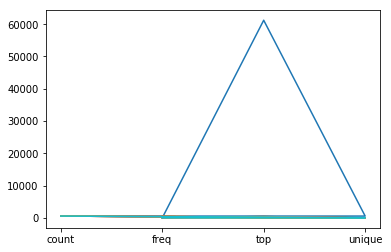

In [42]:
plt.plot(data.describe())
plt.show()

## Conclusion
- Line to Line Voltage Yellow Phase to Red Phase is always zero
- More Current lead to less Wh
